In [11]:
#About the data:
#https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

# State	                    : 거주구역
# Sex	                    : 성별
# GeneralHealth	            : 일상적인 몸 상태 [Excellent, Very good, Good, Fair, Poor]
# PhysicalHealthDays	    : 30일 기준, 질병이나 부상 등 신체적으로 아픈 날 수
# MentalHealthDays	        : 30일 기준, 우울이나 스트레스 등 정신적으로 아픈 날 수
# LastCheckupTime	        : 마지막으로 검진 받은 기록 [1년 이내, 1~2년, 2~5년, 5년 이상]
# PhysicalActivities	    : 운동 / 신체적 활동 있는지
# SleepHours	            : 수면 시간
# RemovedTeeth	            : 발치 수
# HadHeartAttack	        : 심장마비 경험
# HadAngina                 : 협심증
# HadStroke                 : 뇌졸증
# HadAsthma                 : 천식
# HadSkinCancer             : 피부암
# HadCOPD                   : 만성폐쇄성폐질환
# HadDepressiveDisorder     : 우울증
# HadKidneyDisease          : 신부증
# HadArthritis              : 관절염
# HadDiabetes               : 당뇨 [당뇨 아님, 전당뇨거나 경계성 당뇨, 임신성 당뇨, 당뇨]
# DeafOrHardOfHearing       : 청각장애
# BlindOrVisionDifficulty	: 시각장애
# DifficultyConcentrating	: 집중하기 힘듦
# DifficultyWalking	        : 걷기 힘듦
# DifficultyDressingBathing	: 스스로 옷을 입거나 씻기 힘듦
# DifficultyErrands	        : 일상 업무에 어려움
# SmokerStatus	            : 흡연자 [비흡연자, 금연, 종종 흡연, 매일 흡연]
# ECigaretteUsage	        : 전자담배 흡연자 [경헙 없음, 현재는 사용하지 않음, 종종 흡연, 매일 흡연]
# ChestScan	                : 가슴 CT 나 X-ray 촬영 여부
# RaceEthnicityCategory	    : 인종 [히스패닉, 흑인, 백인, 여러인종, 다른 인종) [다른 인종들은 히스패닉이 아닌 경우에만 표시]
# AgeCategory	            : 나이 카테고리 [18~24, 25~29, 30~34, 35~39, 40~44, 45~49, 50~54, 55~59, 60~64, 65~69, 70~74, 75~79, 80이상]
# HeightInMeters	        : 키
# WeightInKilograms	        : 몸무게
# BMI	                    : BMI
# AlcoholDrinkers	        : 음주 여부
# HIVTesting	            : HIV 검사 결과
# FluVaxLast12	            : 12개월 안에 감기 백신 접종 여부
# PneumoVaxEver	            : 폐렴 백신 접종 경험
# TetanusLast10Tdap	        : 10년 안에 파상풍 주사 경험 [경험 없음, Tdap 주사, Tdap 외의 다른 약물 주사, 어떤 약물인지 모름]
# HighRiskLastYear	        : 지난해 위험한 사고나 질병 경험 유무
# CovidPos                  : 코로나 확진 여부

보통 심장병의 제일 큰 major factor 는 고혈압, 고 콜레스트롤, 담배.
그 외, 당뇨, 비만 (BMI 높음), 신체적 활동, 음주과다 등도 있음.
classes are unbalanced. 

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [13]:
dataset = pd.read_csv("heart_2022_with_nans.csv")
print(dataset.shape)
dataset.head()

(445132, 40)


,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [14]:
dataset.describe()


,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434205.000000,436065.000000,439679.000000,416480.000000,403054.000000,396326.000000
mean,4.347919,4.382649,7.022983,1.702691,83.074470,28.529842
std,8.688912,8.387475,1.502425,0.107177,21.448173,6.554889
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [16]:
dataset.isna().sum()

State                            0
Sex                              0
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

In [17]:
dataset.isnull().sum()

State                            0
Sex                              0
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

<Axes: xlabel='HadHeartAttack', ylabel='count'>

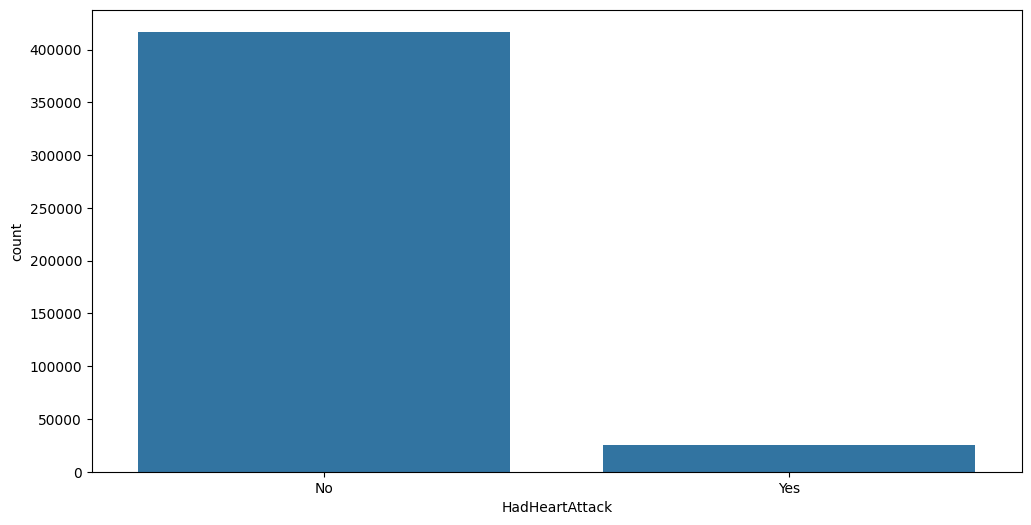

In [19]:
plt.figure(figsize = (12, 6))

sns.countplot(x = 'HadHeartAttack', data = dataset)